In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras, unique
#%matplotlib inline
import numpy as np
import cv2
import joblib
from tensorflow.python.keras.models import load_model

import images in default and gray scale mode

In [2]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[500:1700, 700:2600]


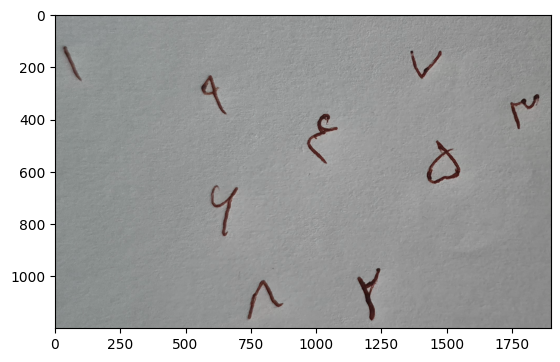

In [3]:

gray = cv2.imread('HandWrite.jpg', cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
gray = gray[500:1700, 700:2600]
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [26]:
gray

array([[141, 145, 153, ..., 137, 138, 140],
       [149, 139, 150, ..., 137, 145, 145],
       [149, 141, 144, ..., 145, 150, 146],
       ...,
       [137, 142, 133, ..., 138, 136, 134],
       [138, 138, 131, ..., 137, 134, 135],
       [138, 134, 136, ..., 137, 136, 136]], dtype=uint8)

Convert image data to binary

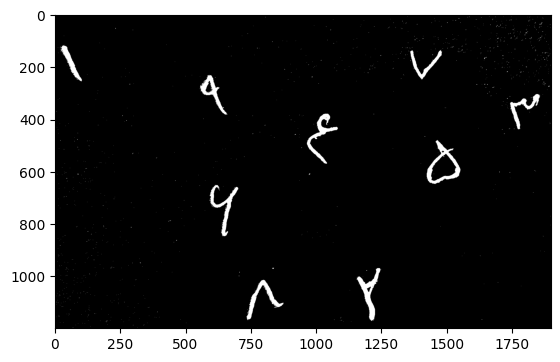

In [4]:
# openCV data handling
_, graycv = cv2.threshold(gray, 127.5, 255, cv2.THRESH_BINARY_INV)

plt.imshow(graycv, cmap="gray")
plt.show()

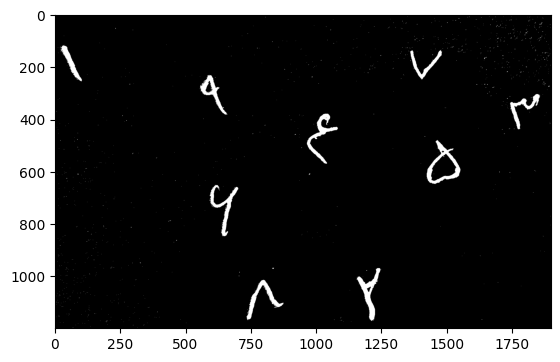

In [5]:
# numpy data handling
gray[gray<127.5]=0
gray[gray>127.5]=255
gray = 255-gray
plt.imshow(gray, cmap="gray")
plt.show()

Crop numbers with help of ConnectedComponents function

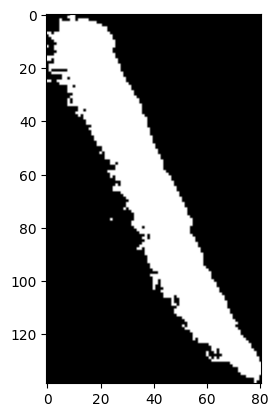

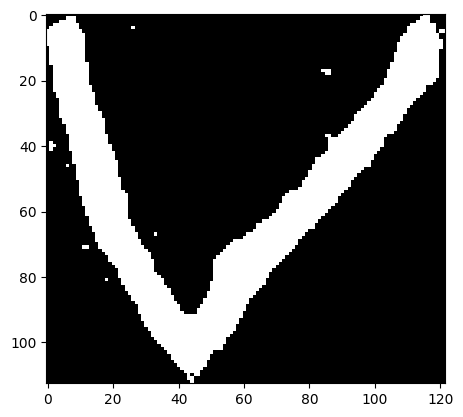

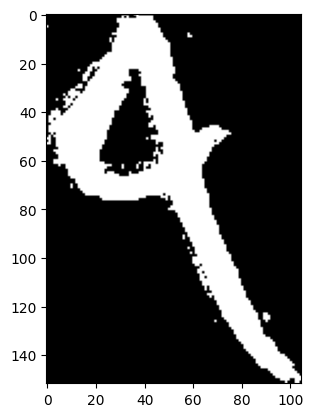

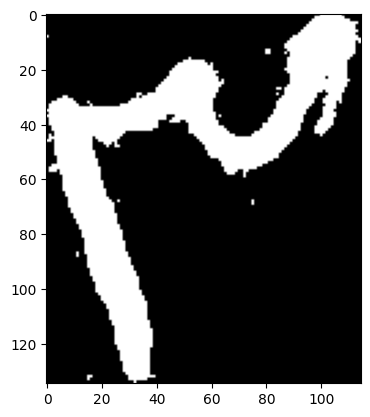

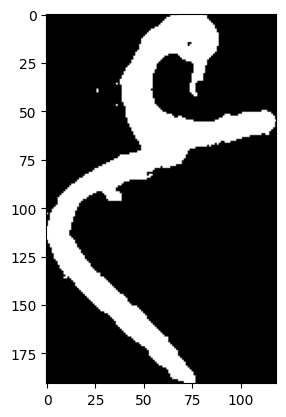

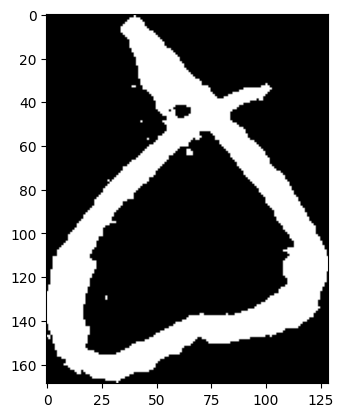

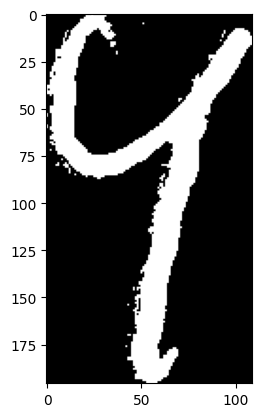

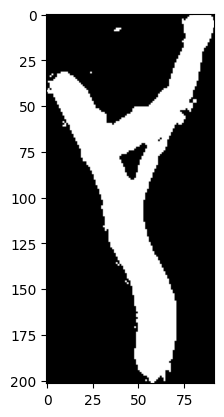

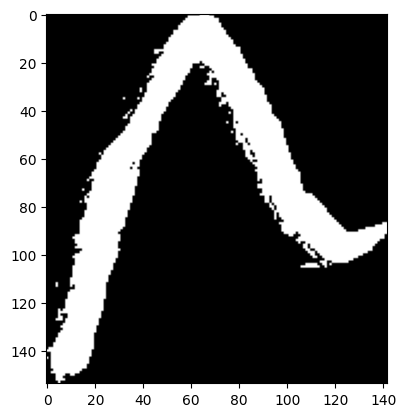

<Figure size 640x480 with 0 Axes>

In [6]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray, connectivity=8)

for i in range(1, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        plt.imshow(image, cmap="gray")
        plt.figure()
plt.show()

KNN Algorithm

In [33]:
net = joblib.load("persian-digit-classification-with-knn.pkl")
net

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Nural Network Algorithm

In [7]:
from tensorflow.keras.models import load_model
net = load_model("model.keras")
net

<Sequential name=sequential, built=True>

In [8]:
for i in range(0, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        inp = cv2.resize(image, (5, 5))
        inp = inp.reshape(1,25)
        r = net.predict(inp)
        print(r)
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.00091297 0.00059041 0.0219911  0.18449119 0.38458958 0.04203187
  0.21625657 0.04245393 0.06801891 0.03866346]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


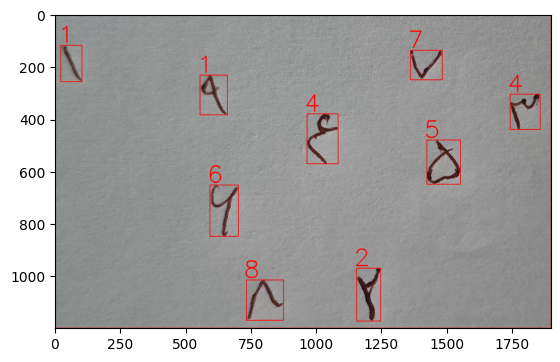

In [9]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[500:1700, 700:2600]

for i in range(0, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        inp = cv2.resize(image, (5, 5))
        inp = inp.reshape(1,25)
        r = net.predict(inp)
        r = np.argmax(r)
        cv2.putText(img, text=str(r), org=(x-10, y-10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(255,0,0), thickness=3)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img)
plt.show()
